# Explore datasets

There are three datasets:
- ED_visits.csv 
- specialty.csv
- yet_to_arrive.csv

See the data dictionaries for more information. 

The ED visits database uses the following concepts:

- visit: a single visit to the ED which may end in admission or discharge
- prediction times: the times in the day at which predictions are to be made (eg 06:00, 09:30, 12:00, 15:30, 22:00)
- visit snapshots: snapshots of visits observed at the prediction times; a vist may have multiple visit snapshots



## Set up the notebook environment


In [66]:
# Reload functions every time
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from pathlib import Path
import sys
import json

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


PROJECT_ROOT = Path().home() 
USER_ROOT = Path().home() / 'work'

sys.path.append(str(USER_ROOT / 'patientflow' / 'patientflow'))
sys.path.append(str(USER_ROOT / 'patientflow' / 'functions'))
sys.path.append(str(USER_ROOT / 'ed-predictor' / 'functions'))


data_path = Path(USER_ROOT / 'ed-predictor' / 'data-raw')



## Load parameters

These are set in config.json. You can change these for your own purposes. But the times of day will need to match those in the provided dataset if you want to run this notebook successfully.

In [9]:
# Load the times of day
import yaml

config_path = Path(USER_ROOT / 'patientflow')

with open(config_path / 'config.yaml', 'r') as file:
    config = yaml.safe_load(file)
    
# Convert list of times of day at which predictions will be made (currently stored as lists) to list of tuples
prediction_times = [tuple(item) for item in config['prediction_times']]

# See the times of day at which predictions will be made
prediction_times

[(6, 0), (9, 30), (12, 0), (15, 30), (22, 0)]

## Load data

In [41]:
import pandas as pd
import pickle

# csv_filename = 'ed_visits.csv'
# data_path = Path(USER_ROOT / 'ed-predictor' / 'data-raw')
# full_path = data_path / csv_filename
# df = pd.read_csv(full_path)

data_filename = 'ed_visits_20230101_20230107.pickle'
data_path = Path(USER_ROOT / 'ed-predictor' / 'data-raw')
full_path = data_path / data_filename

with open(full_path, 'rb') as f:
    df = pickle.load(f)

In [42]:
df.columns

Index(['snapshot_date', 'time_of_day', 'visit_number', 'elapsed_los_td', 'sex',
       'arrival_method', 'current_location_type', 'total_locations_visited',
       'num_obs', 'num_obs_events', 'num_obs_types',
       'num_lab_batteries_ordered', 'visited_majors', 'visited_otf',
       'visited_paeds', 'visited_rat', 'visited_resus', 'visited_sdec',
       'visited_sdec_waiting', 'visited_taf', 'visited_unknown', 'visited_utc',
       'visited_waiting', 'num_obs_BLOOD PRESSURE', 'num_obs_PULSE',
       'num_obs_R AIR OR OXYGEN',
       'num_obs_R GLASGOW COMA SCALE BEST MOTOR RESPONSE',
       'num_obs_R LEVEL OF CONSCIOUSNESS',
       'num_obs_R NEWS SCORE RESULT - DISPLAYED',
       'num_obs_R UCLH ED MANCHESTER TRIAGE CALCULATED ACUITY',
       'num_obs_R UCLH ED MANCHESTER TRIAGE OBJECTIVE PAIN SCORE',
       'num_obs_R UCLH ED MANCHESTER TRIAGE SUBJECTIVE PAIN SCORE',
       'num_obs_TEMPERATURE', 'num_obs_R PUPIL REACTION RIGHT',
       'num_obs_R OXYGEN DELIVERY METHOD', 'num_obs

In [60]:
# certain columns are not used in training
exclude_from_plot = [
    "snapshot_id", 
    "visit_number",
    "snapshot_date",
    "prediction_time",
    "random_number",
    "training_validation_test", 
    "is_admitted"]

## Plot functions

In [64]:
from plot_data import main_plot_function

## Arrival and demographic variables



In [72]:
dict_cols['arrival and demographic'] + ['is_admitted']

['elapsed_los_td', 'sex', 'age_group', 'arrival_method', 'is_admitted']

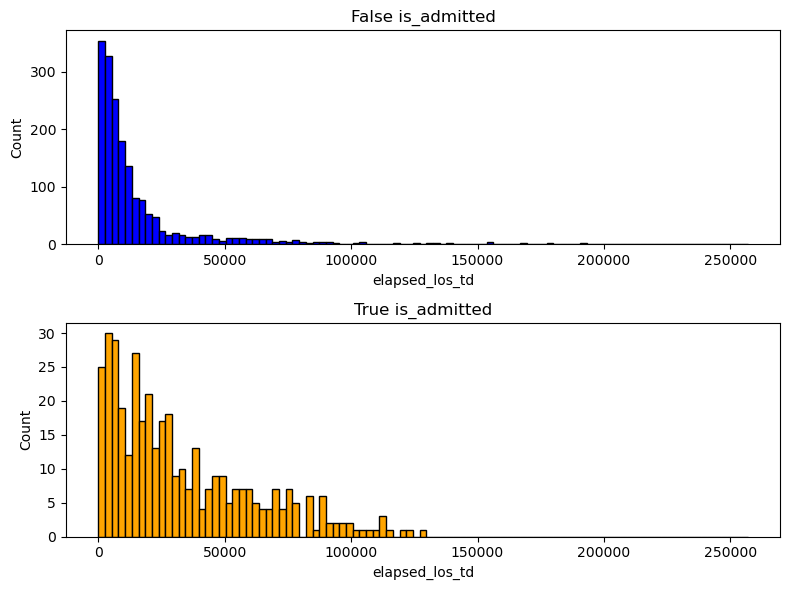

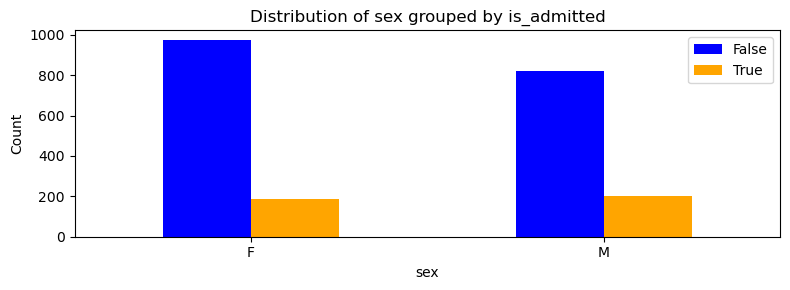

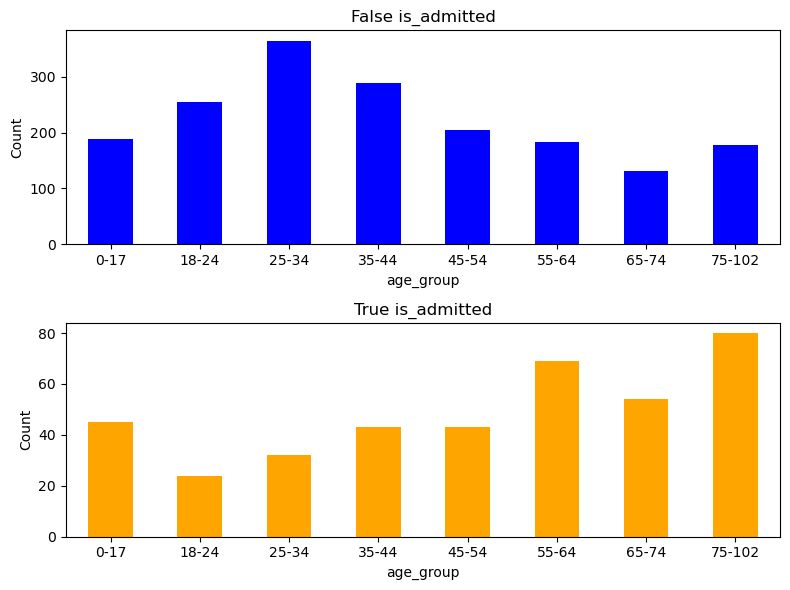

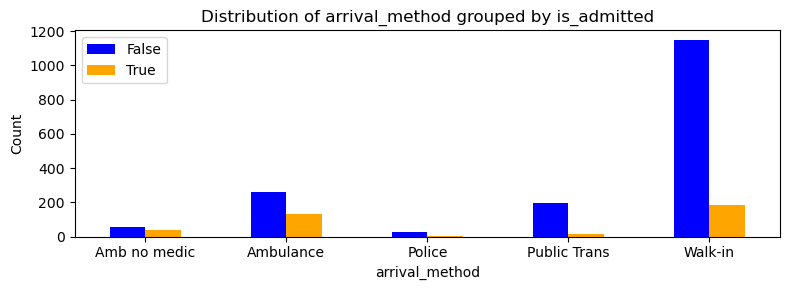

In [73]:
main_plot_function(df[dict_cols['arrival and demographic'] + ['is_admitted']], exclude_from_plot)

## Summary variables

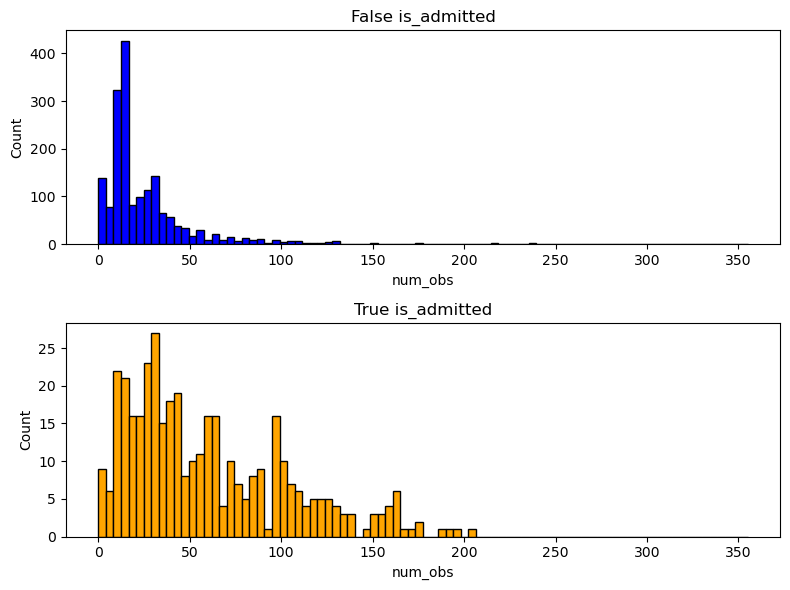

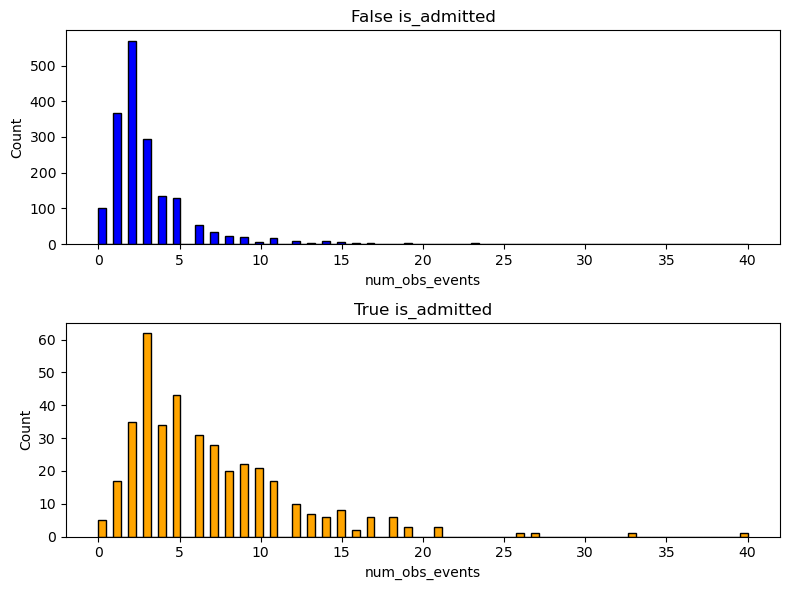

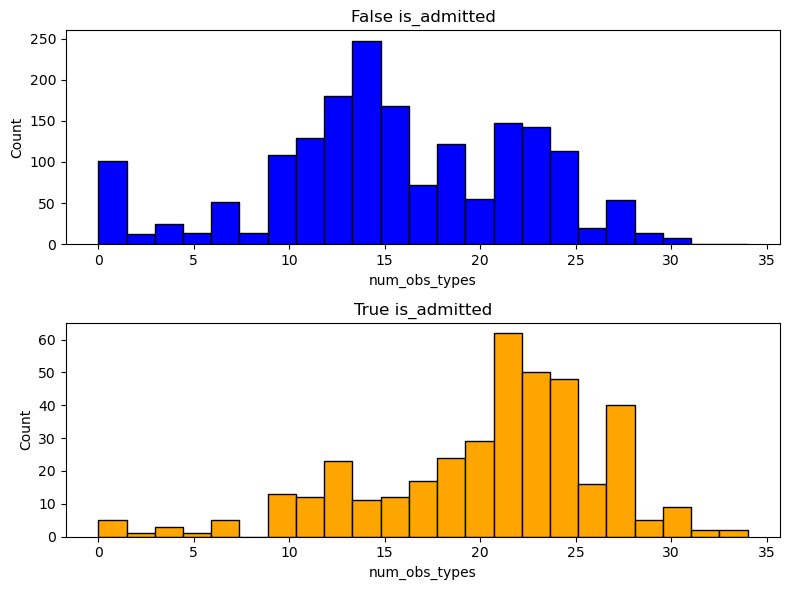

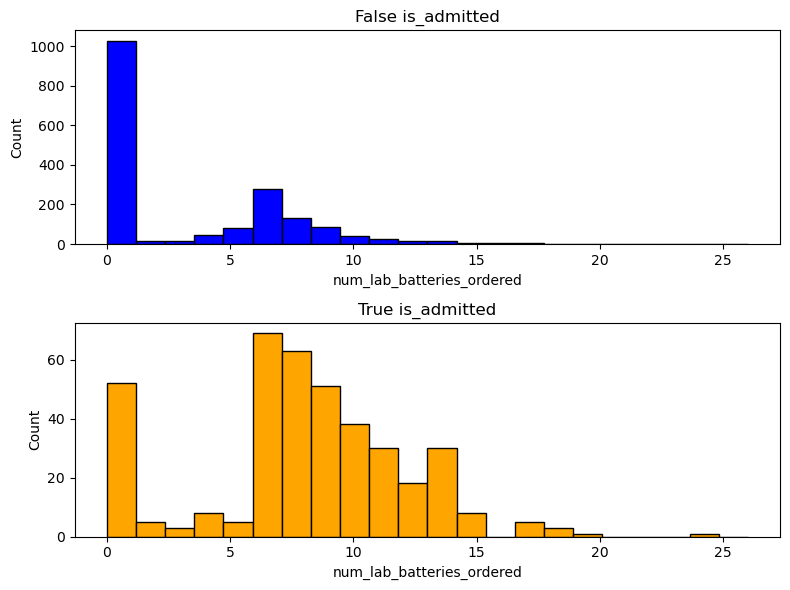

In [74]:
main_plot_function(df[dict_cols['summary'] + ['is_admitted']], exclude_from_plot)

## Location variables

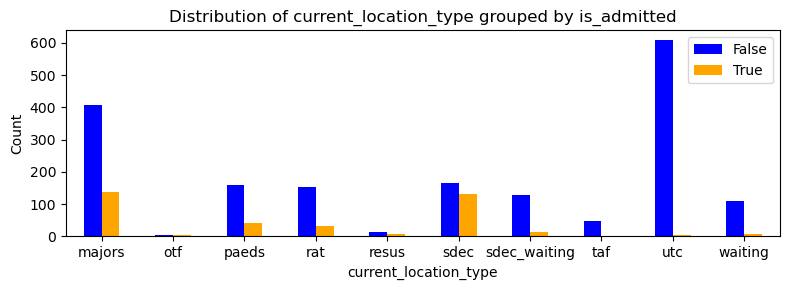

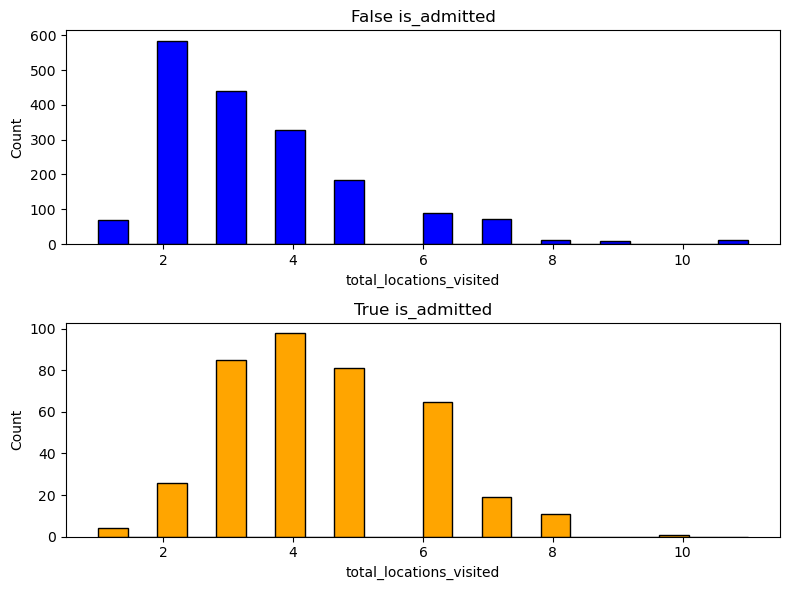

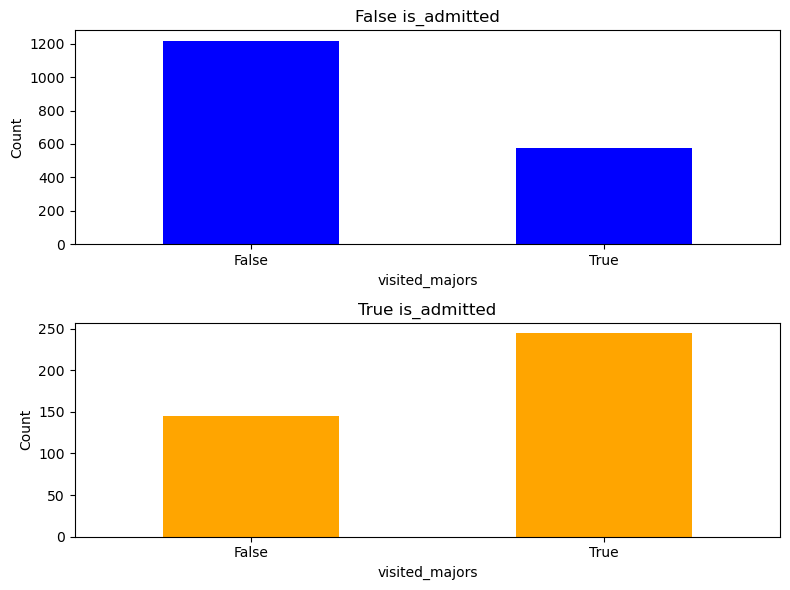

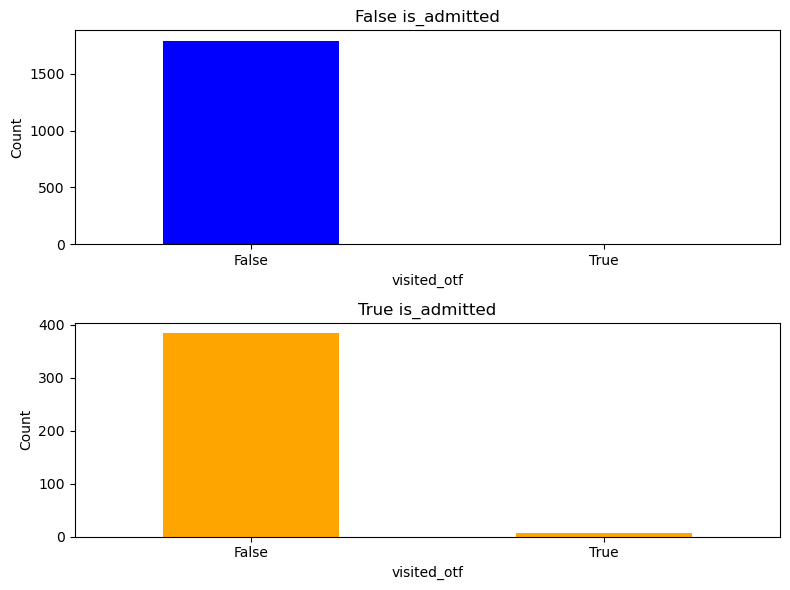

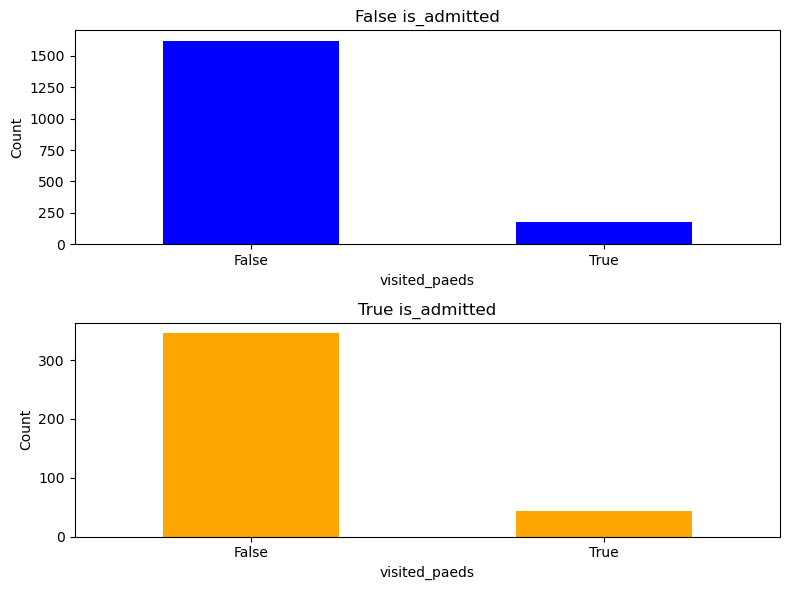

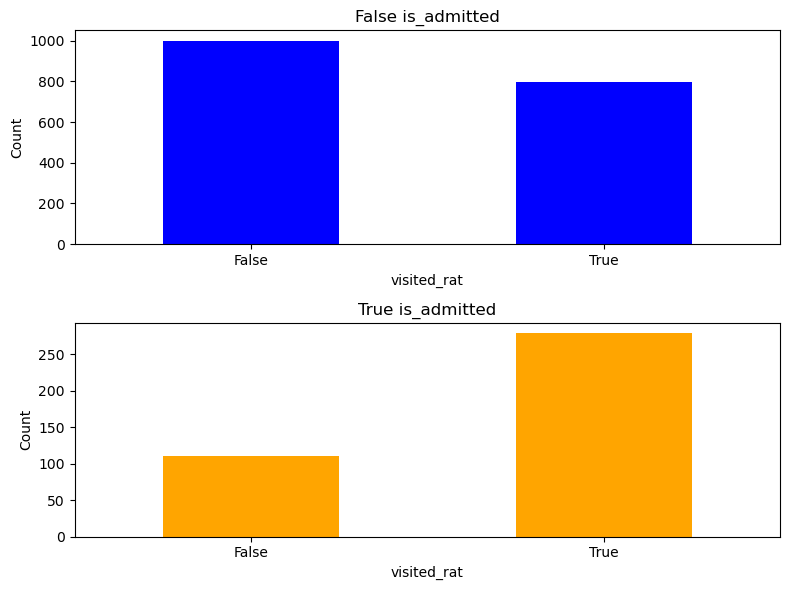

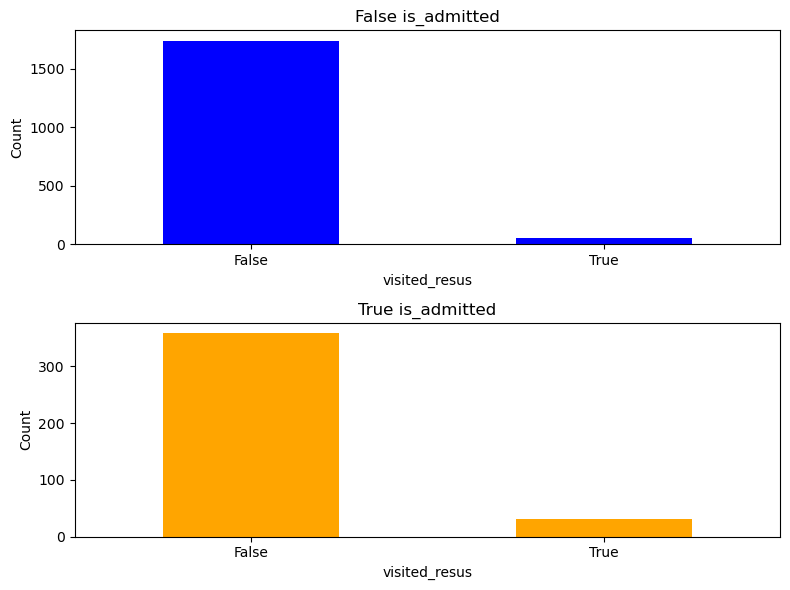

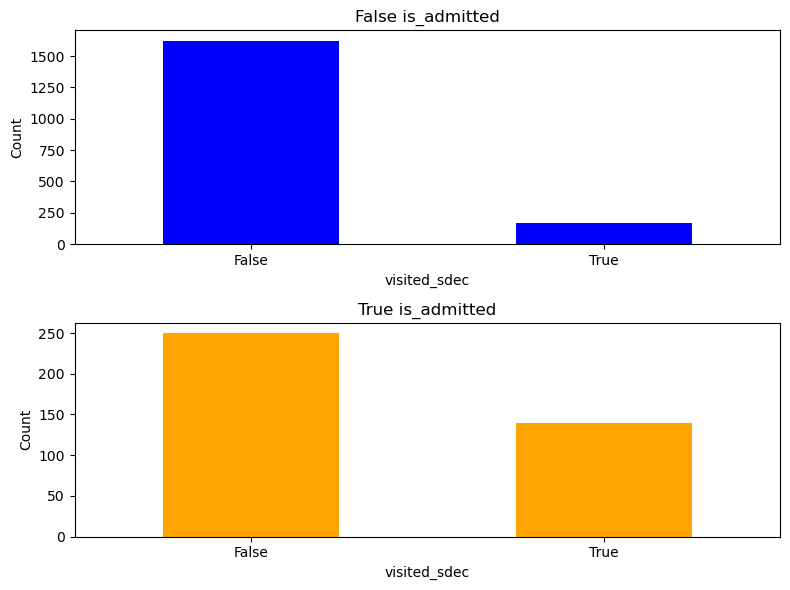

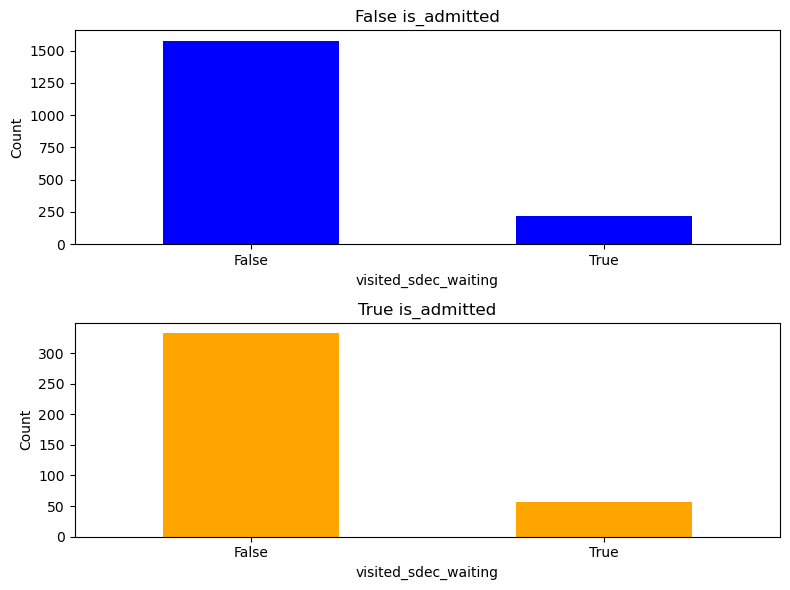

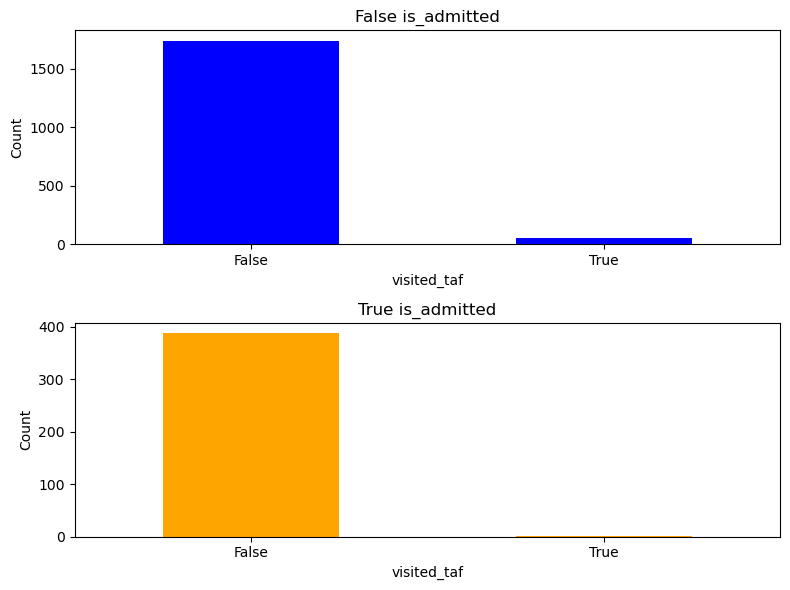

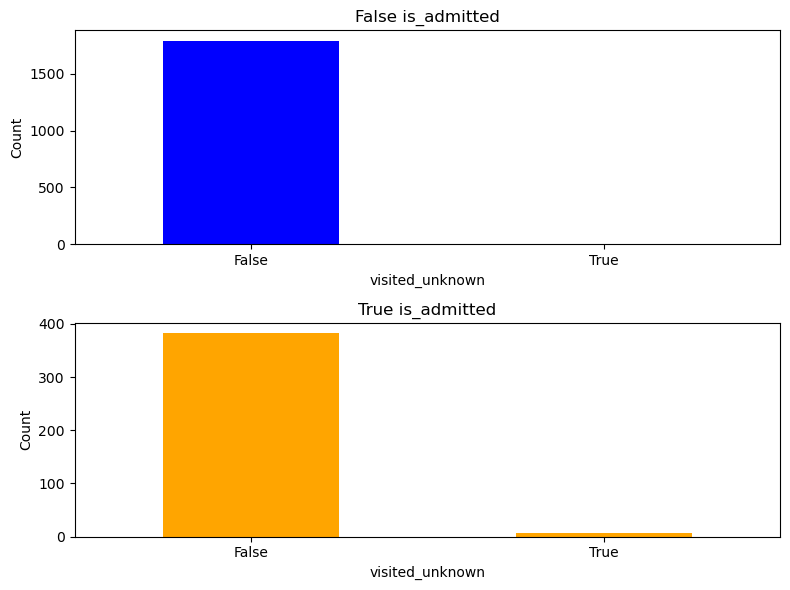

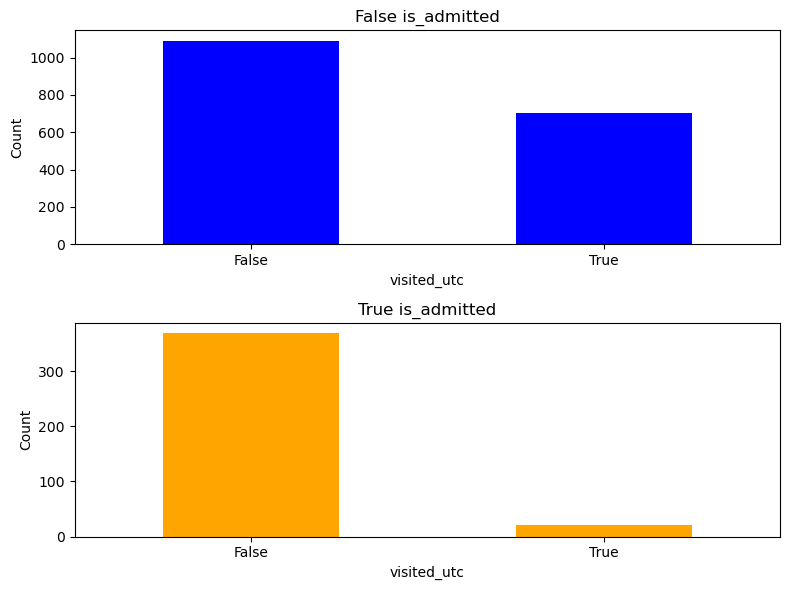

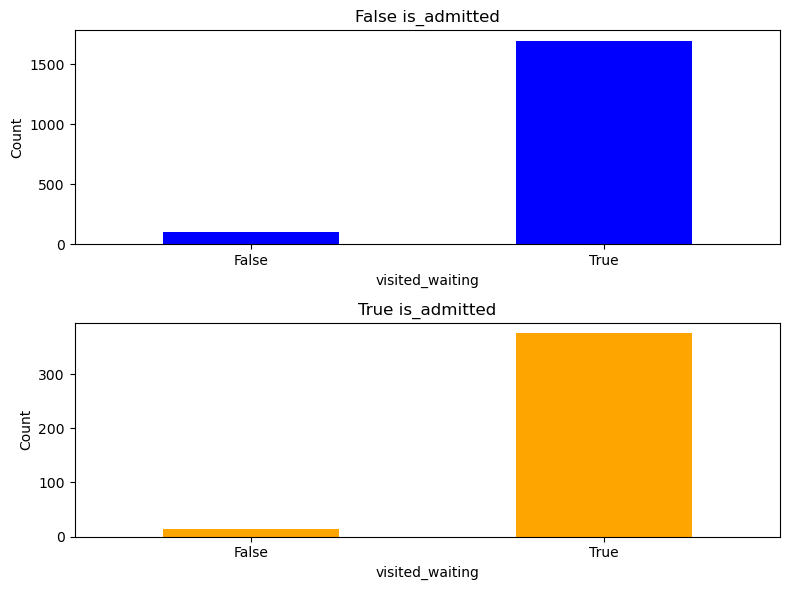

In [75]:
main_plot_function(df[dict_cols['location'] + ['is_admitted']], exclude_from_plot)

In [76]:
dict_cols.keys()

dict_keys(['not used in training', 'arrival and demographic', 'summary', 'location', 'observations', 'lab orders and results', 'consults', 'outcome'])

## Observations variables

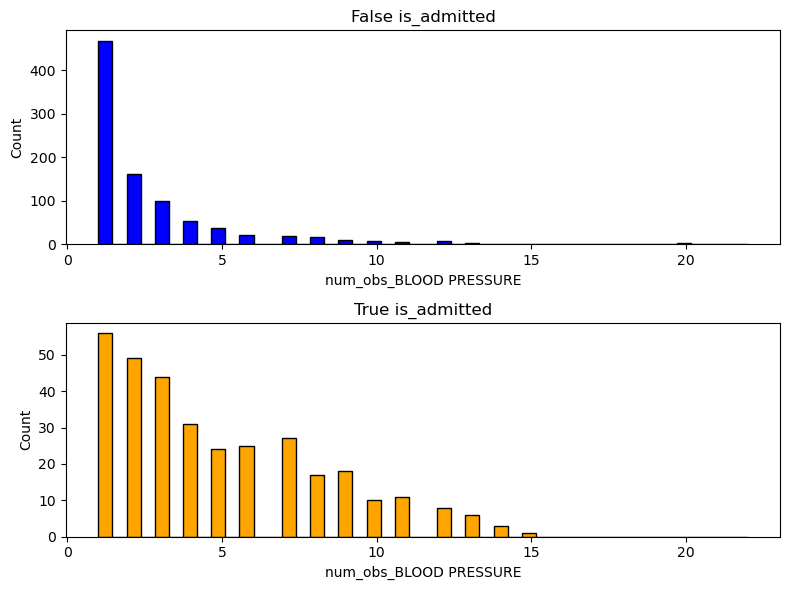

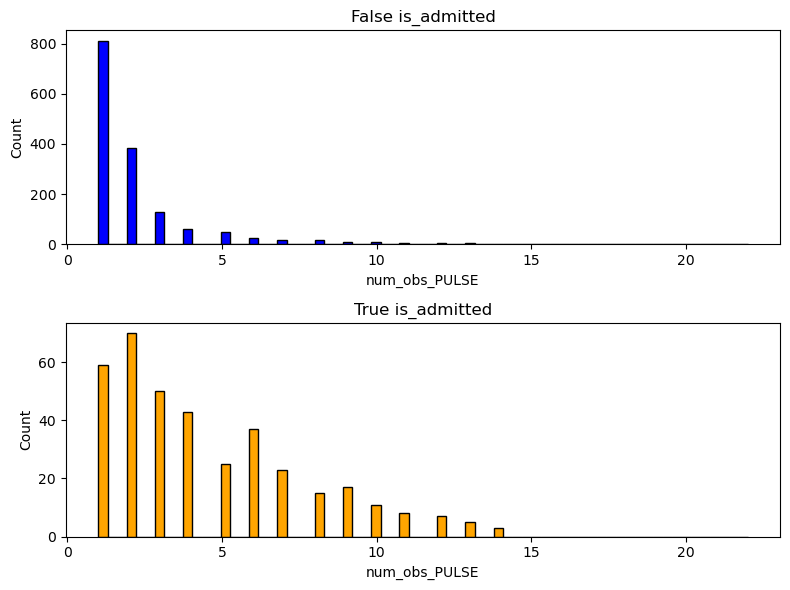

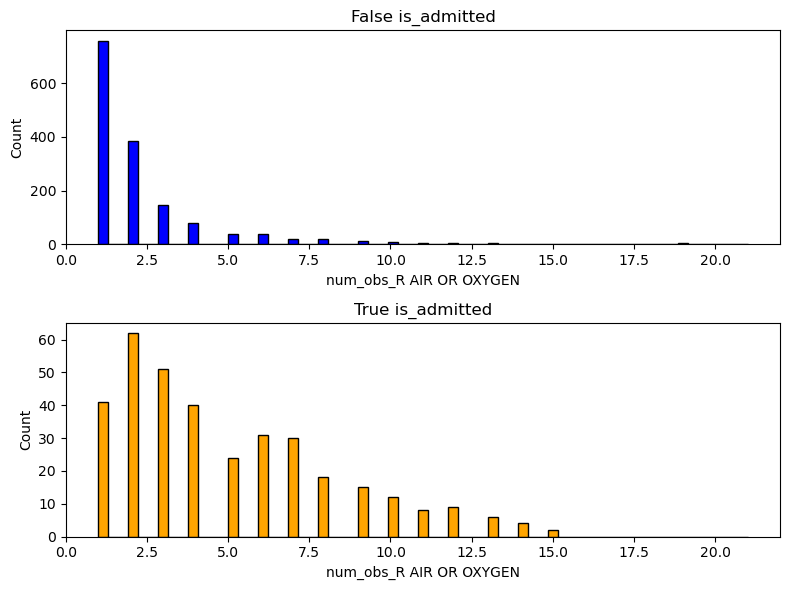

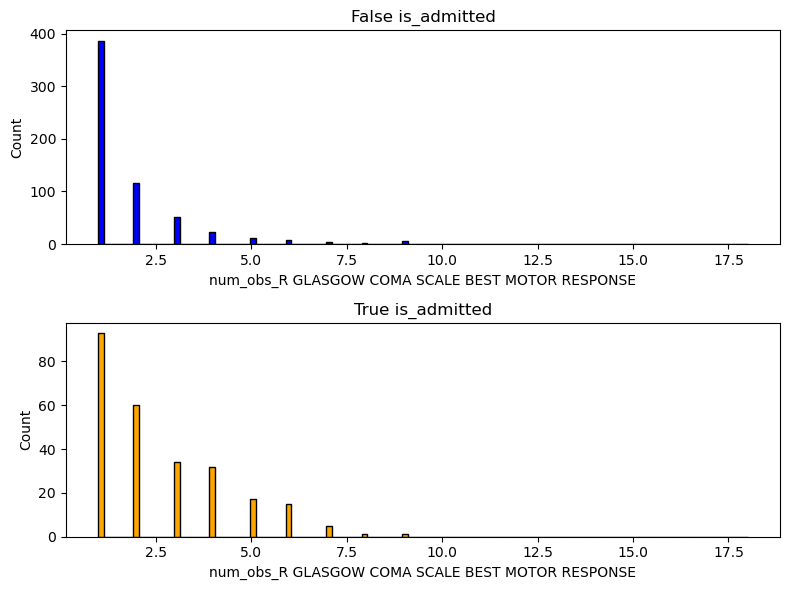

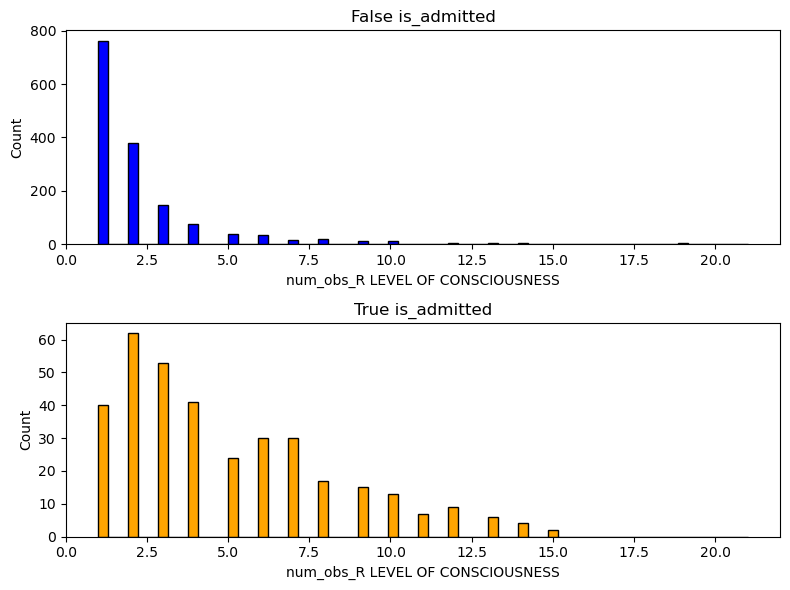

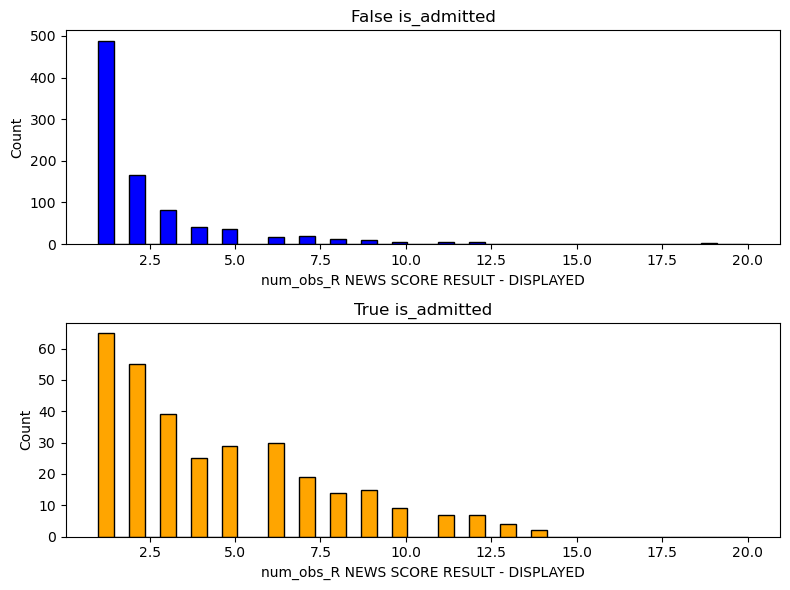

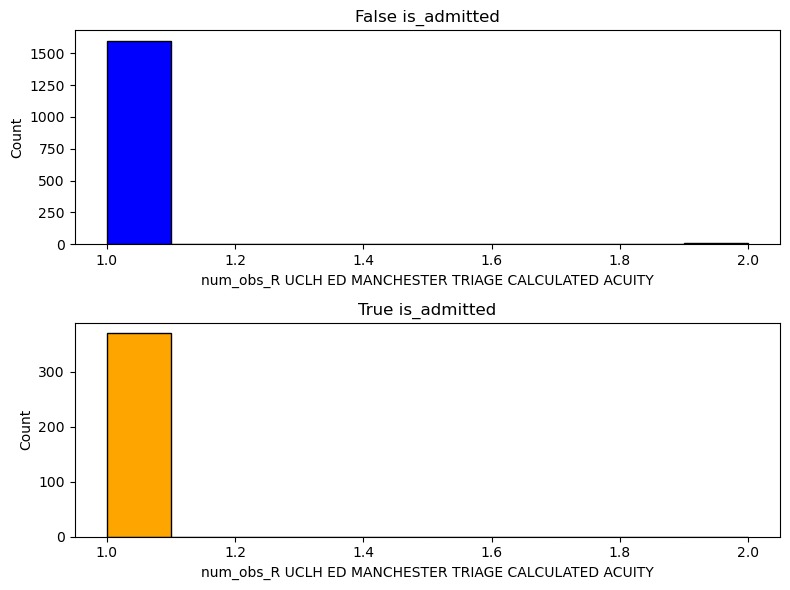

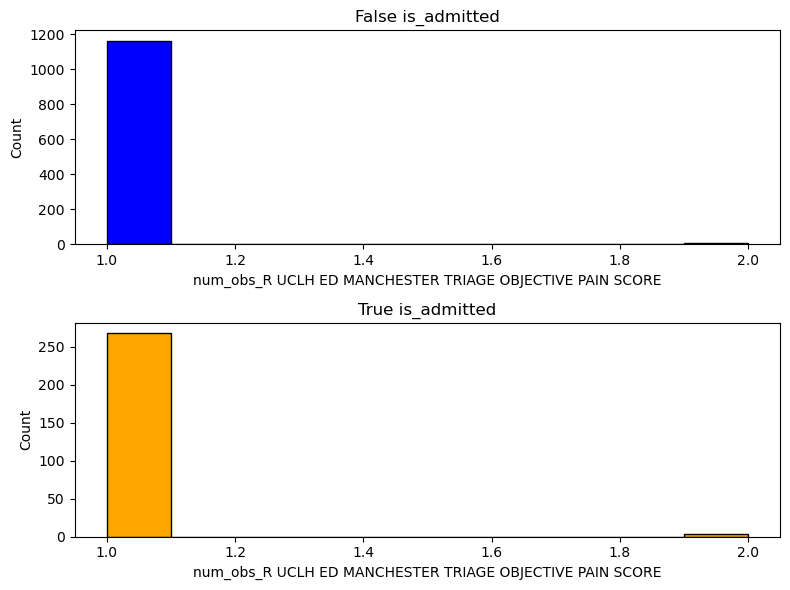

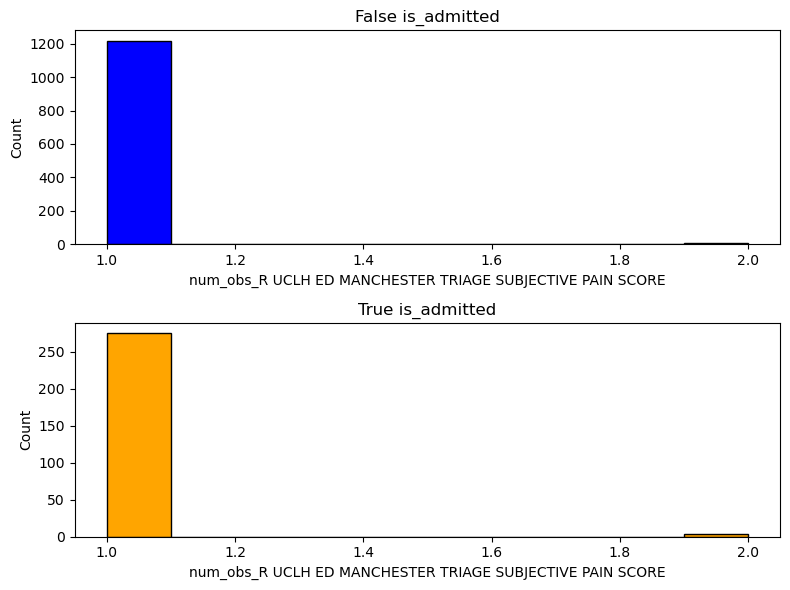

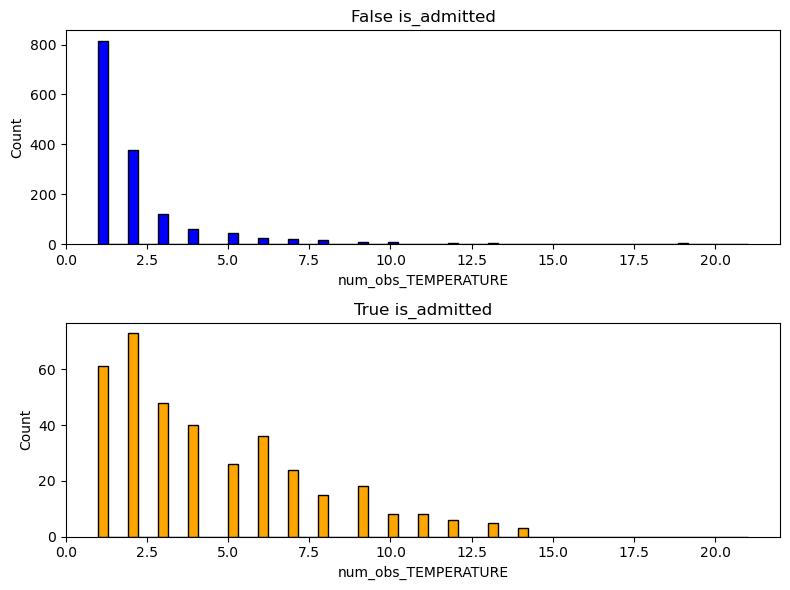

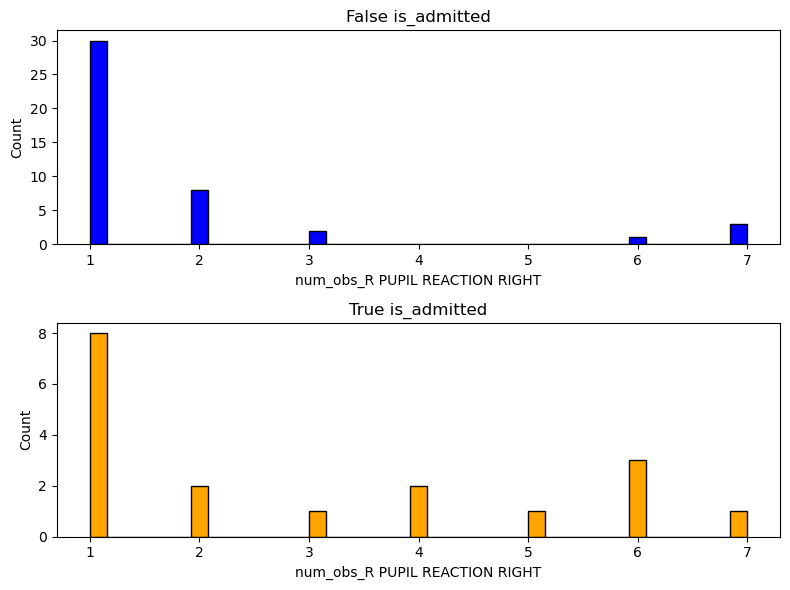

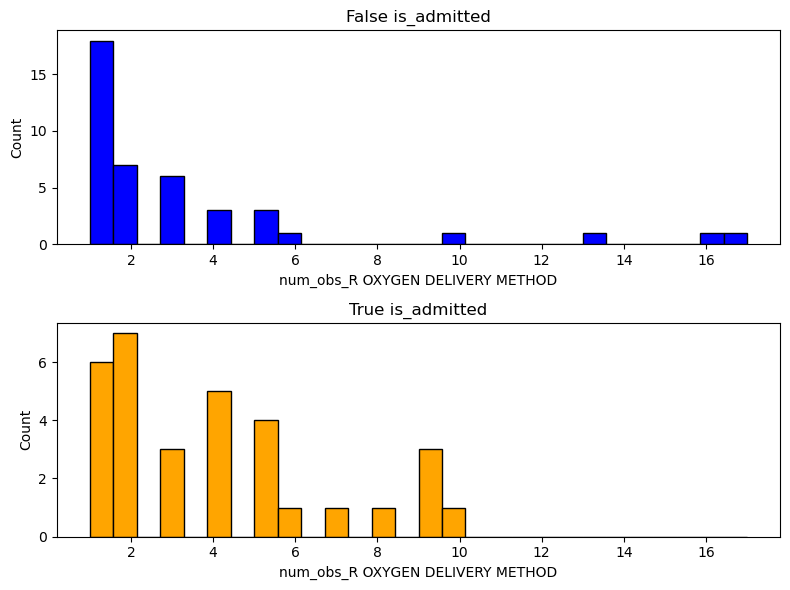

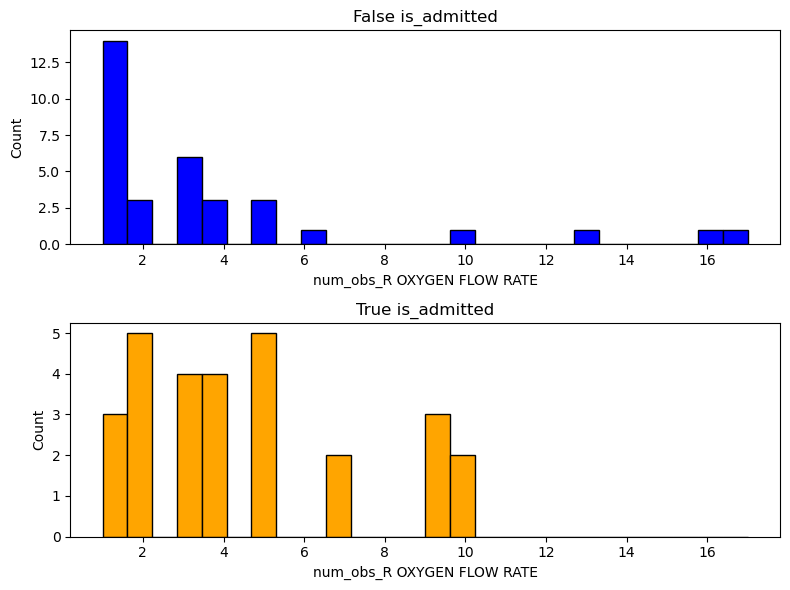

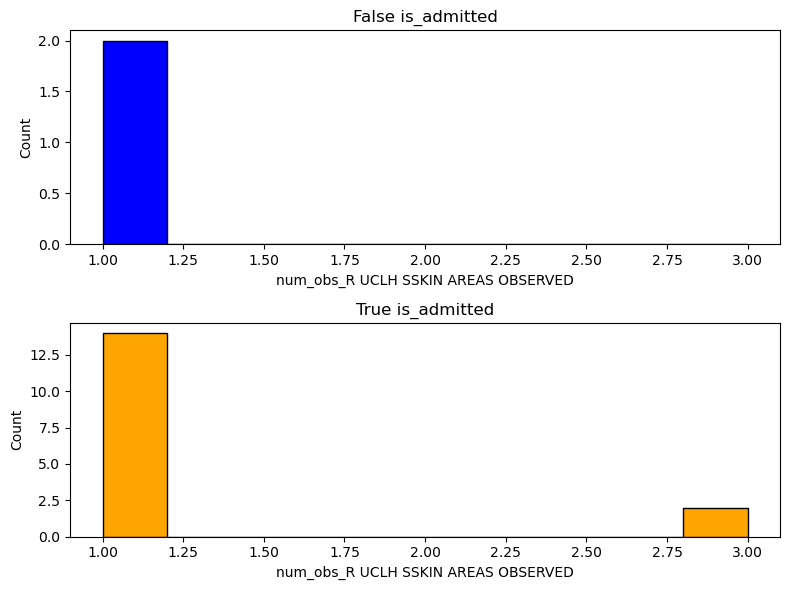

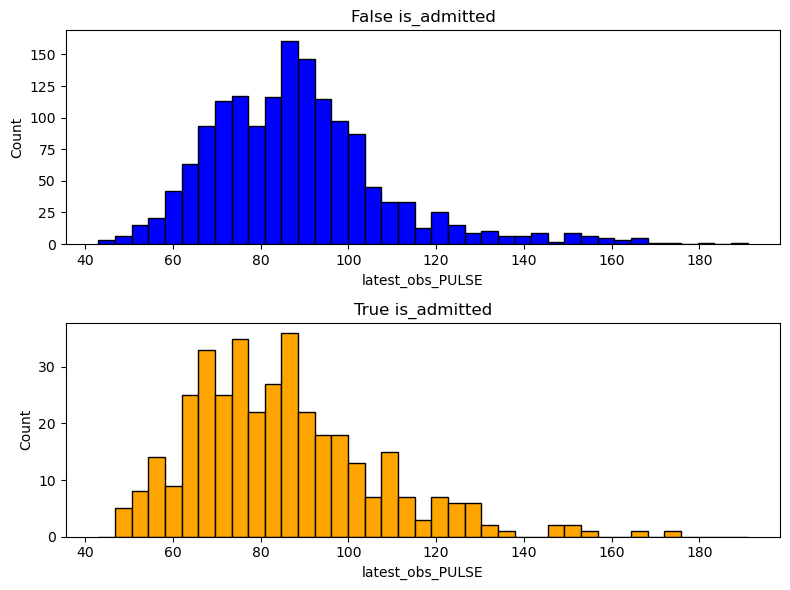

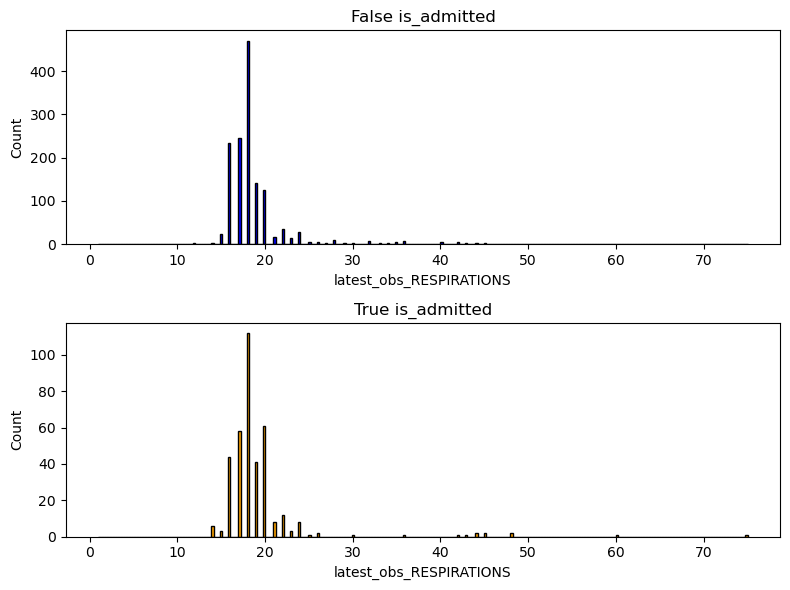

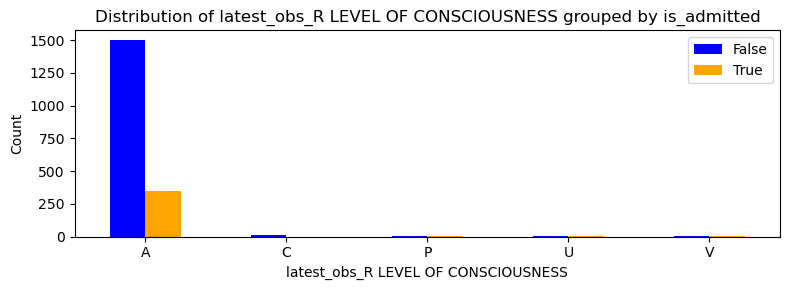

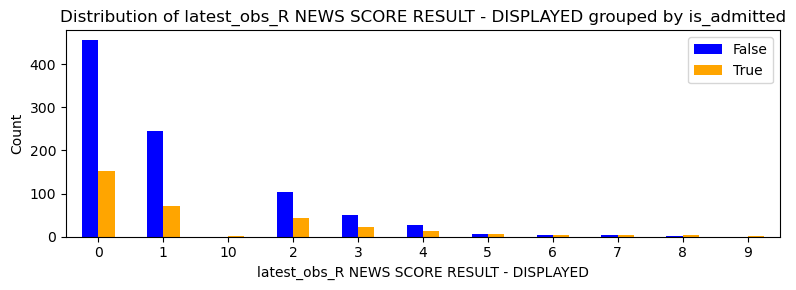

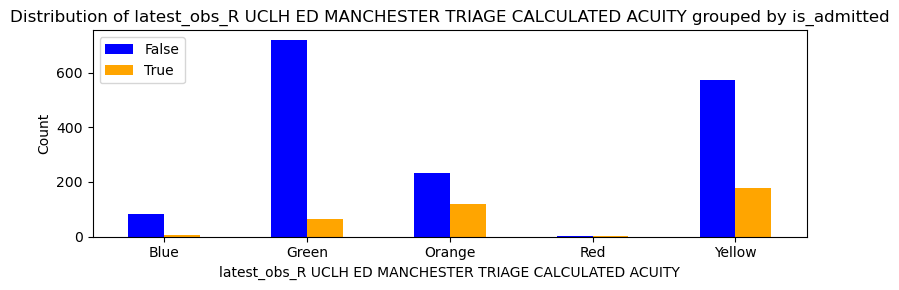

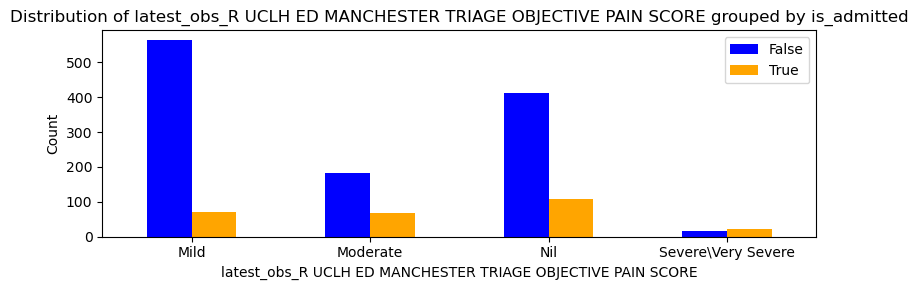

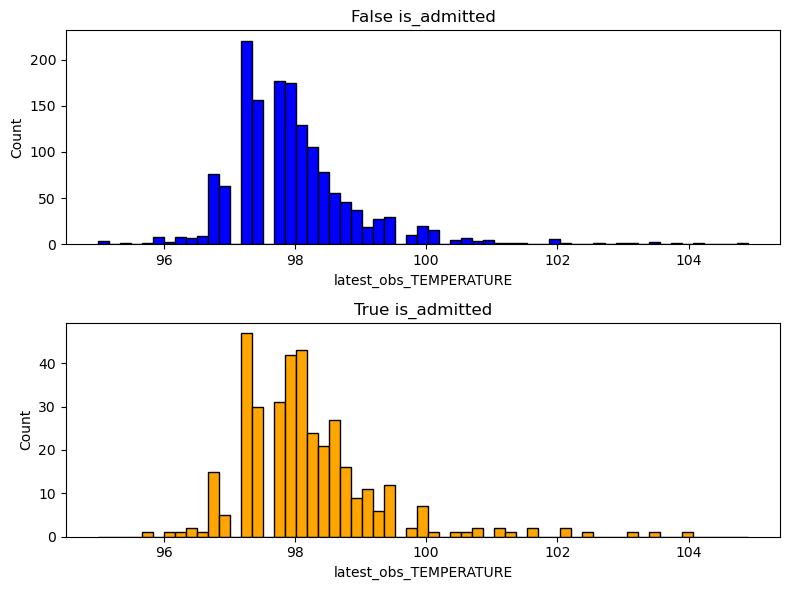

In [77]:
main_plot_function(df[dict_cols['observations'] + ['is_admitted']], exclude_from_plot)

## Lab variables

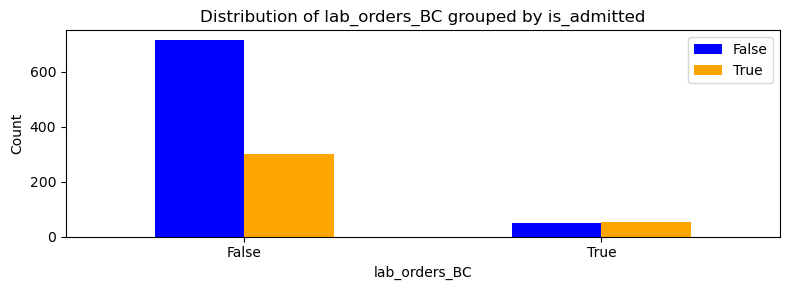

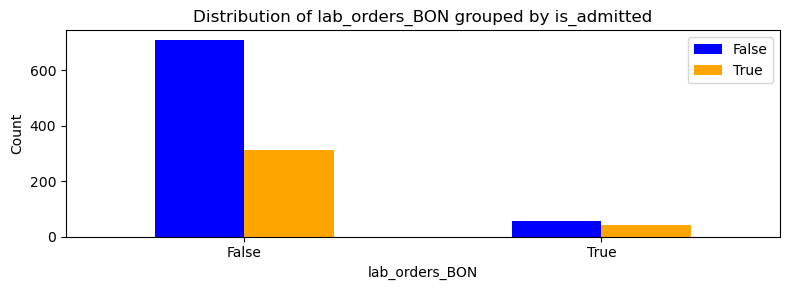

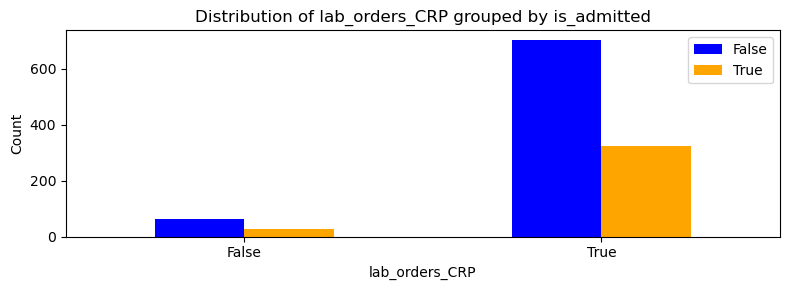

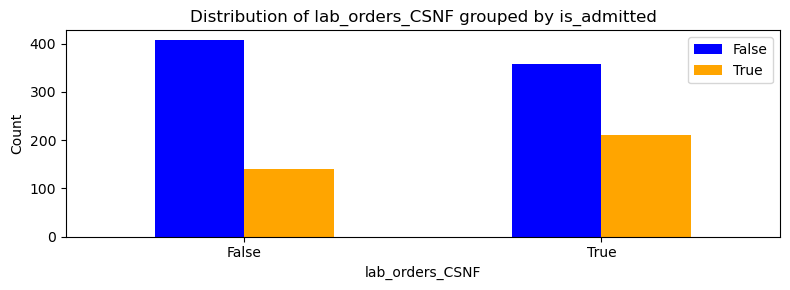

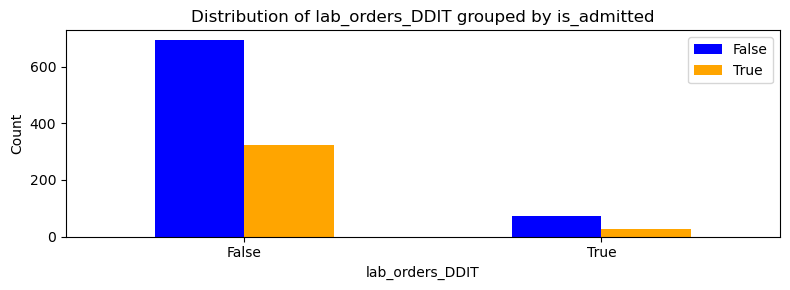

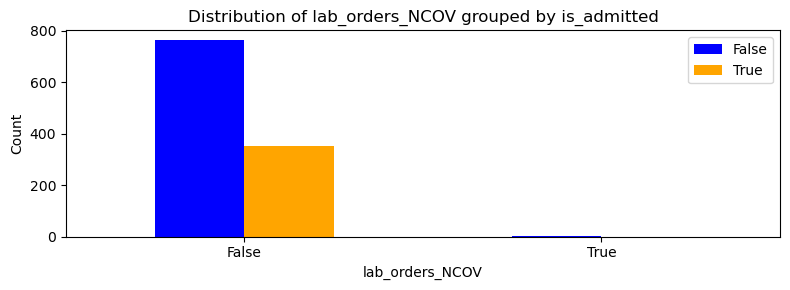

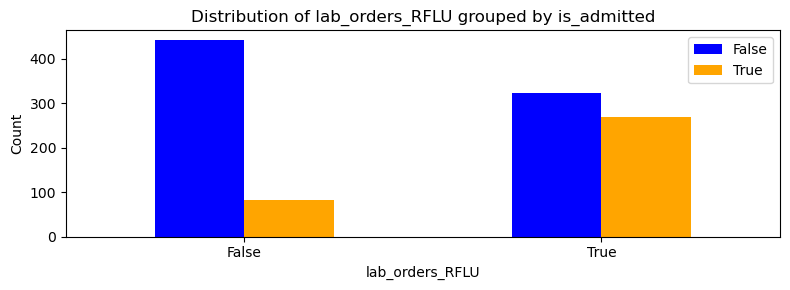

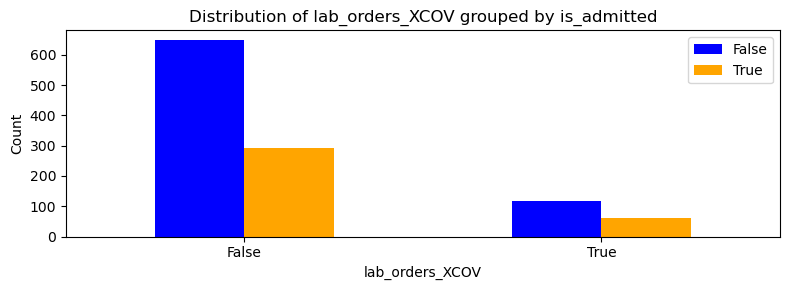

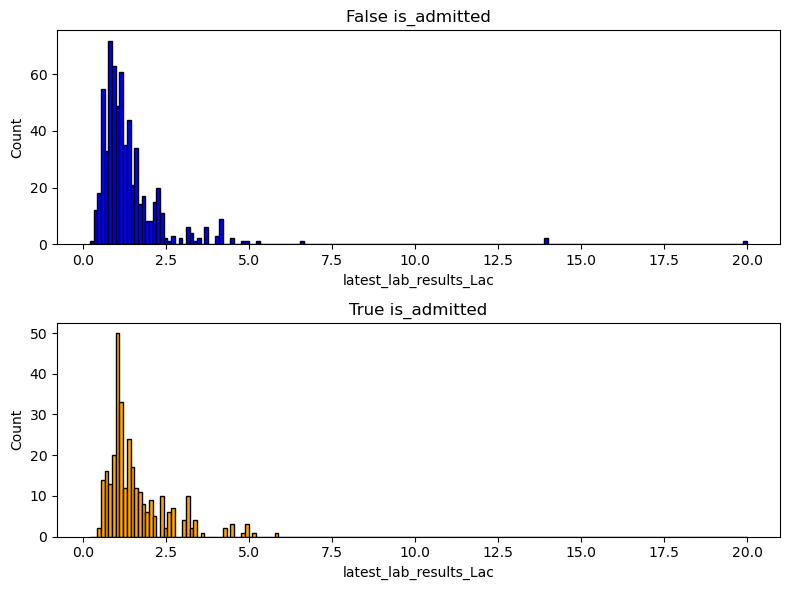

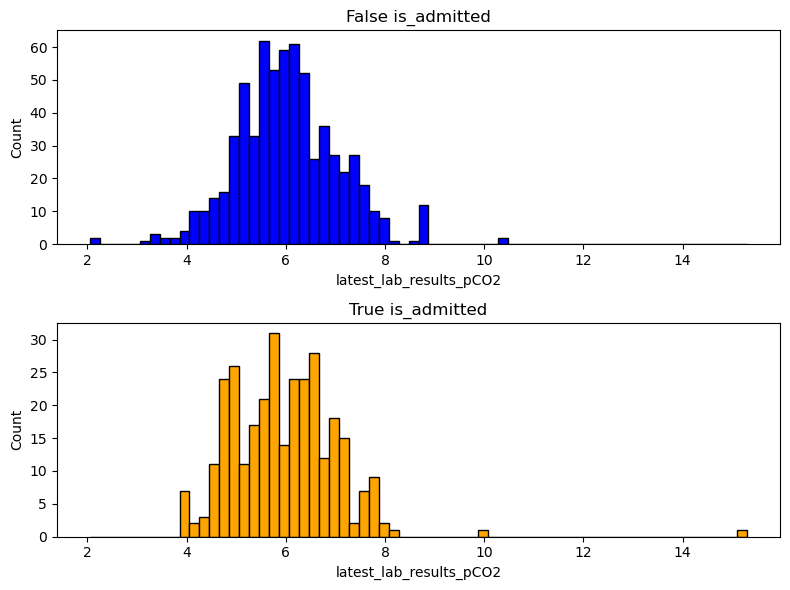

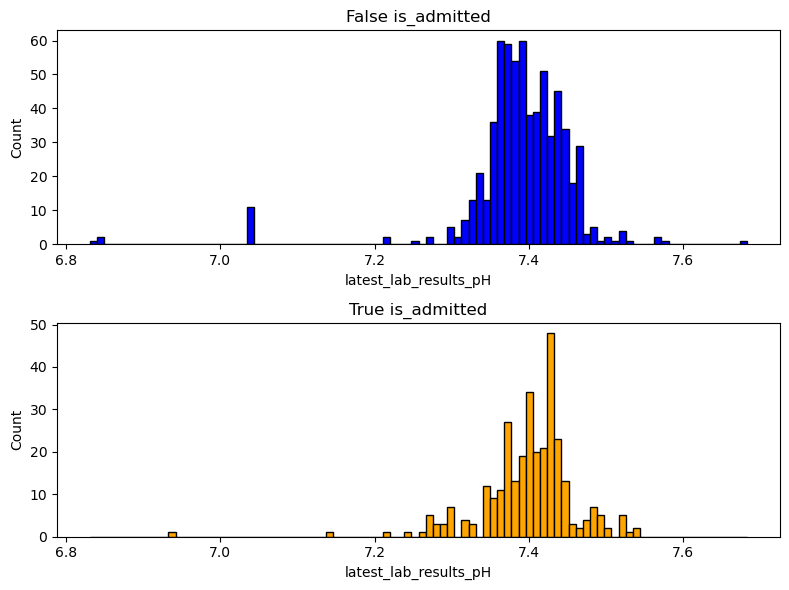

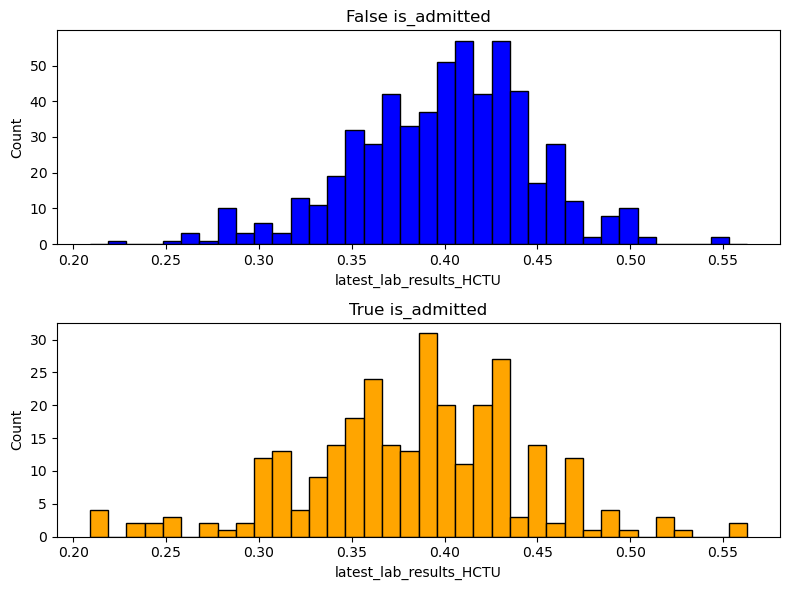

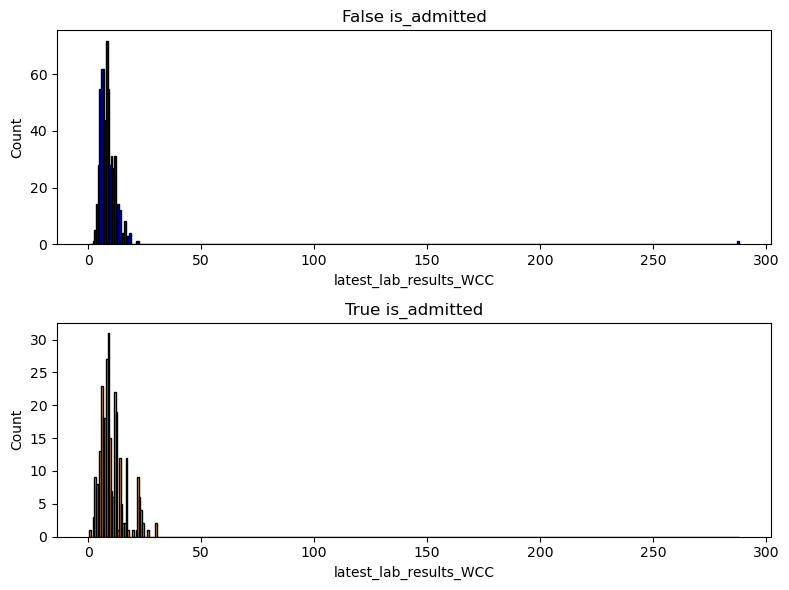

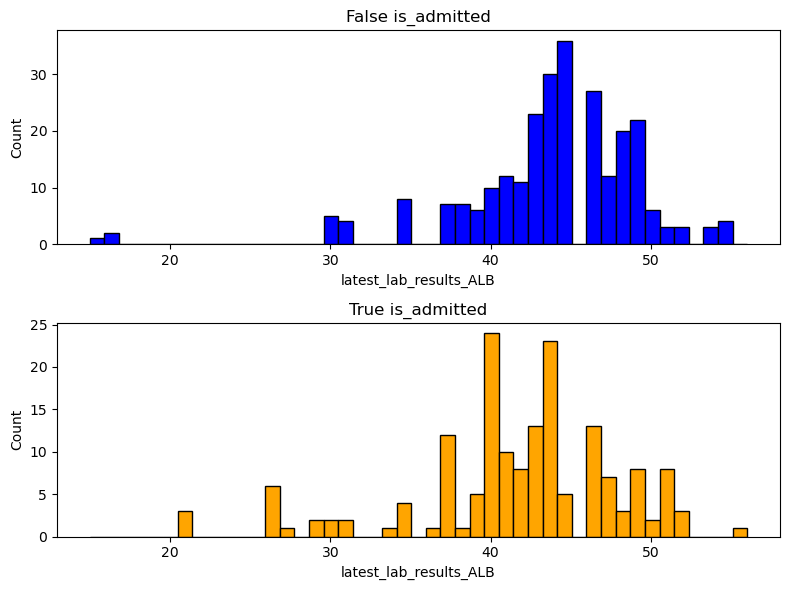

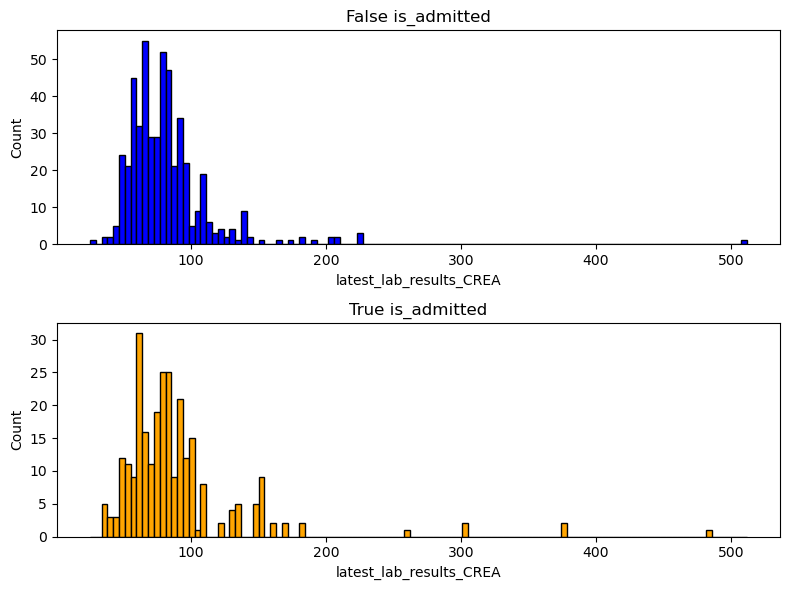

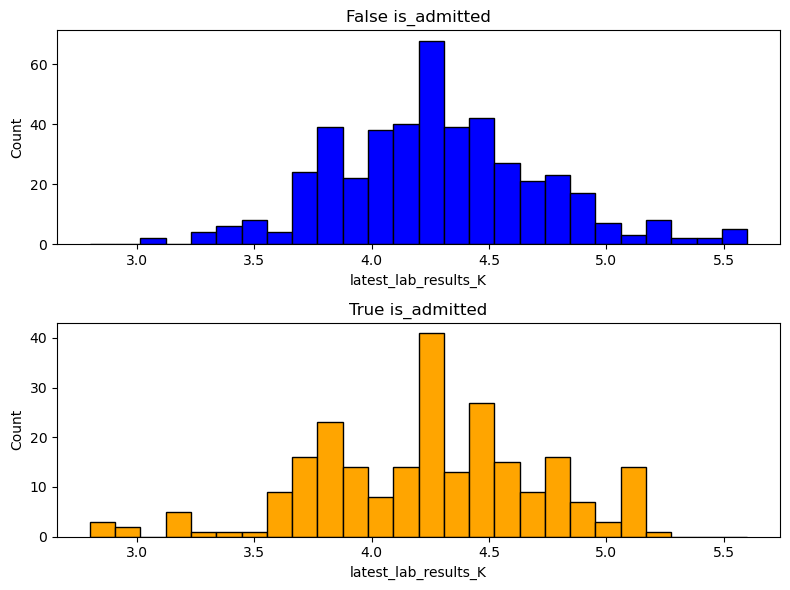

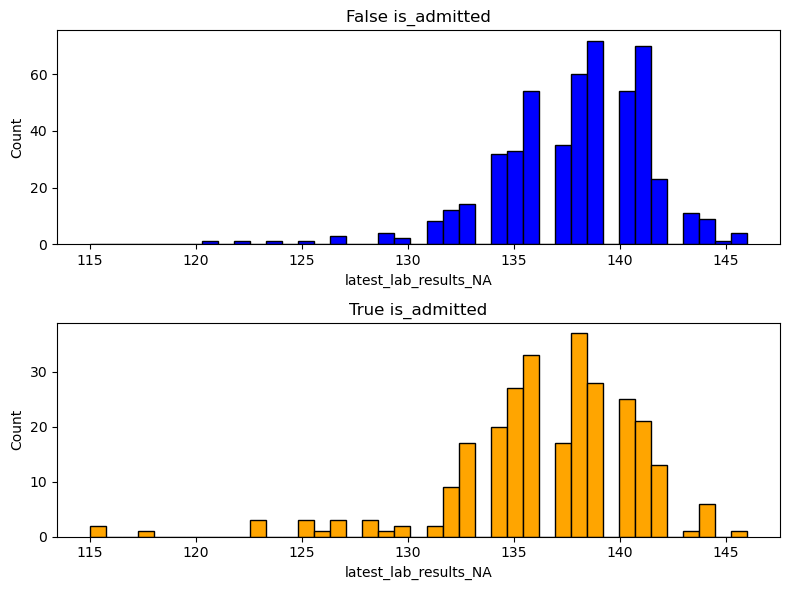

Skipping group True: column latest_lab_results_HCO3 contains only NaN values.


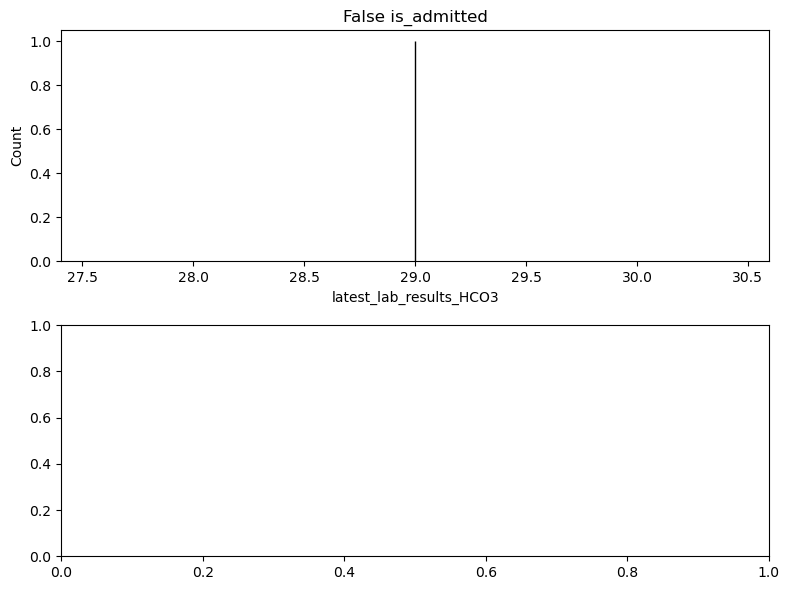

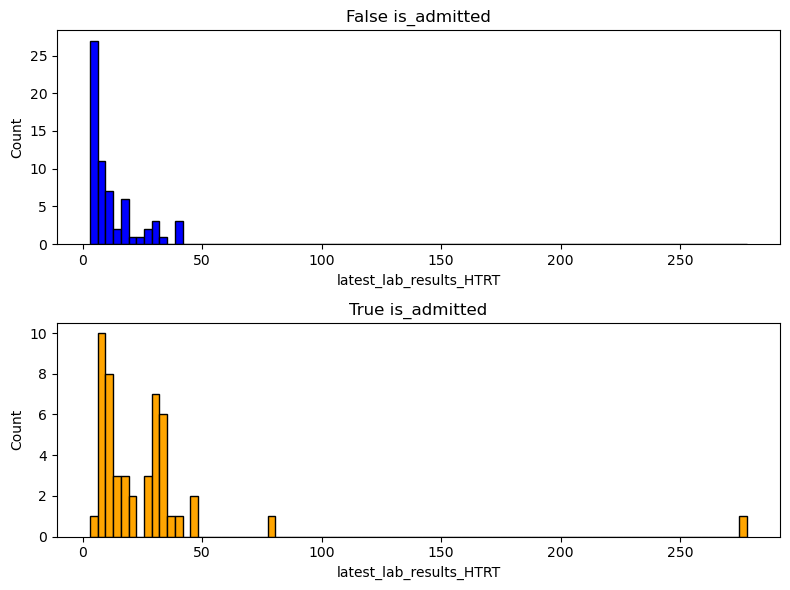

In [70]:
main_plot_function(df[dict_cols['lab orders and results'] + ['is_admitted']], exclude_from_plot)

## Consults variables

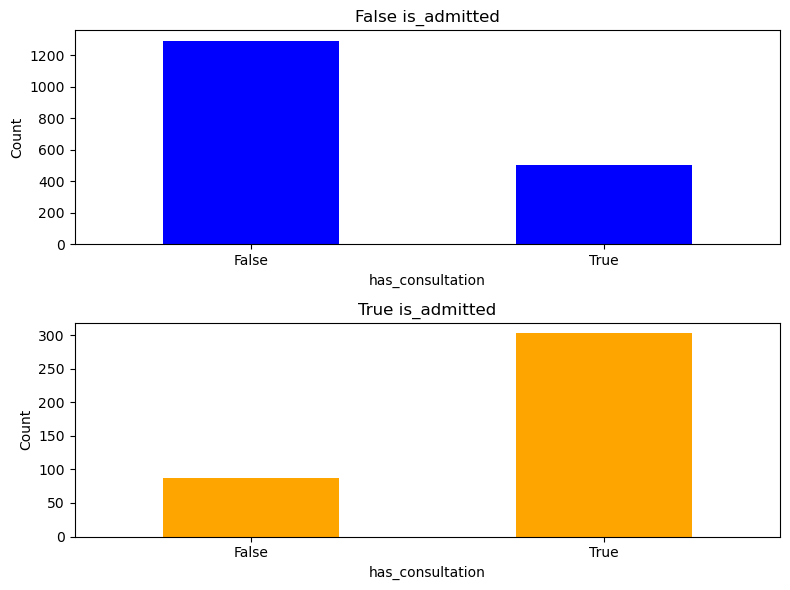

In [71]:
main_plot_function(df[dict_cols['consults'] + ['is_admitted']], exclude_from_plot)